<h1> Predicting purchase for social networking ads using Logistic regression

In [125]:
ad=read.csv("C:/Users/LENOVO/Desktop/sem II/R/ds/Logistic/New folder/Logistic_Regression/Social_Network_Ads.csv")

In [126]:
head(ad)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [127]:
head(is.na(ad))

User.ID,Gender,Age,EstimatedSalary,Purchased
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


In [89]:
str(ad)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [90]:
head(ad)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


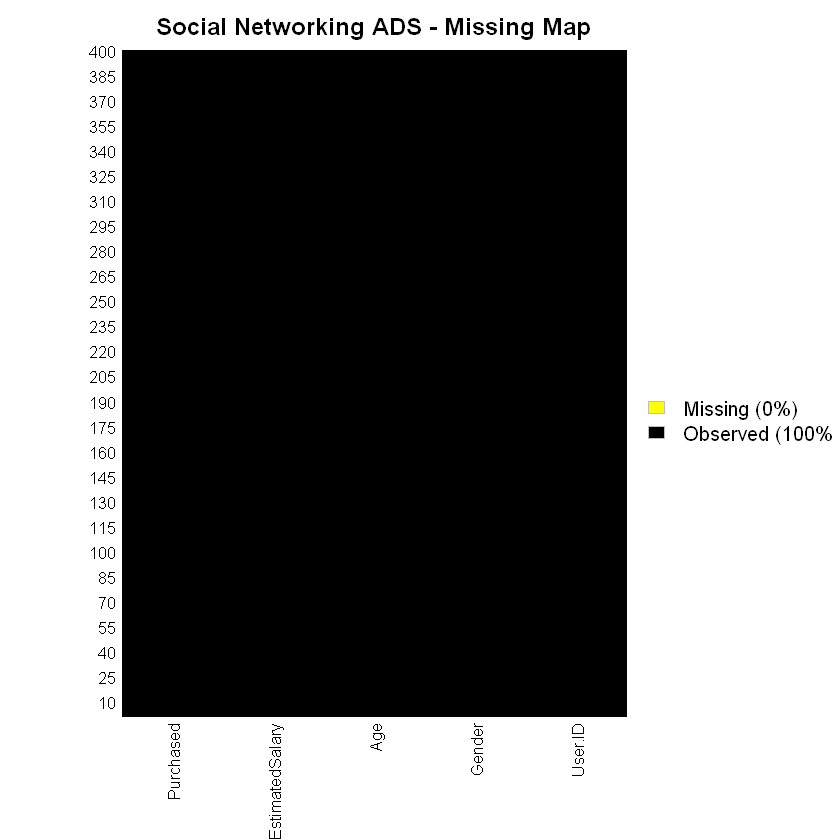

In [91]:
library(Amelia)
missmap(ad,main="Social Networking ADS - Missing Map",
       col=c("yellow","black"), legend=TRUE)

<h3> From this we can understand that there is no missing values present in the data set

In [92]:
str(ad)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [93]:
library(dplyr)

In [94]:
ad=select(ad,-User.ID,-Gender)

<h3> we are eliminating User ID and Gender as they are not contributing for prediction

In [95]:
head(ad,3)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0


In [96]:
str(ad)

'data.frame':	400 obs. of  3 variables:
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [104]:
library(caTools)
#set.seed(101)

In [105]:
split=sample.split(ad$Purchased,SplitRatio=0.70)
final.train=subset(ad,split==TRUE)
final.test=subset(ad,split==FALSE)

<h3> Here we are separating the data for training and testing

In [106]:
final.log.model=glm(formula=Purchased ~ . , family=binomial(link='logit'),data=final.train)

In [107]:
summary(final.log.model)


Call:
glm(formula = Purchased ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8718  -0.5834  -0.1693   0.4377   2.2941  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.197e+01  1.489e+00  -8.044 8.72e-16 ***
Age              2.206e-01  2.940e-02   7.502 6.30e-14 ***
EstimatedSalary  3.606e-05  6.340e-06   5.688 1.29e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 364.98  on 279  degrees of freedom
Residual deviance: 204.00  on 277  degrees of freedom
AIC: 210

Number of Fisher Scoring iterations: 6


In [108]:
fitted.probabilities=predict(final.log.model,newdata=final.test,type='response')

In [109]:
fitted.results=ifelse(fitted.probabilities>0.5,1,0)

In [110]:
misClasificError=mean(fitted.results != final.test$Purchased)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.866666666666667"


<h3> The accuracy of our model is 86.6%

<h2> create confusion matrix for the prediction and true happening

In [111]:
table(final.test$Purchased, fitted.probabilities>0.5)

   
    FALSE TRUE
  0    73    4
  1    12   31

<h3> 73 people out of 400 were predicted not to purchase based on social networking ads and actually they have not purchased(TRUE NEGATIVE)


<H3>4 PEOPLE OUT OF 400 WERE PREDICTED NOT TO PURCHASE BASED ON SOCIAL NETWORKING ADS BUT THEY HACTUALLY HAVE NOT PURCHASED(FALSE POSITIVE)

<H3>12 people out of 400 were predicted  to purchase based n social networking ads and actually they have not purchased(FALSE NEGATIVE)

<H3>31 PEOPLE OUT OF 400 WERE PREDICTE TO PURCHASE BASED ON SOCIAL NETWORKING ADS AND ACTUALLY THEY WERE PURCHASED (TRUE POSITIVE)¶

In [112]:
install.packages('pROC')

Installing package into 'C:/Users/LENOVO/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'pROC' is in use and will not be installed"

In [115]:
library(pROC)

In [120]:
test_prob=predict(final.log.model,newdata=final.test,type="response")


Setting levels: control = 0, case = 1
Setting direction: controls < cases


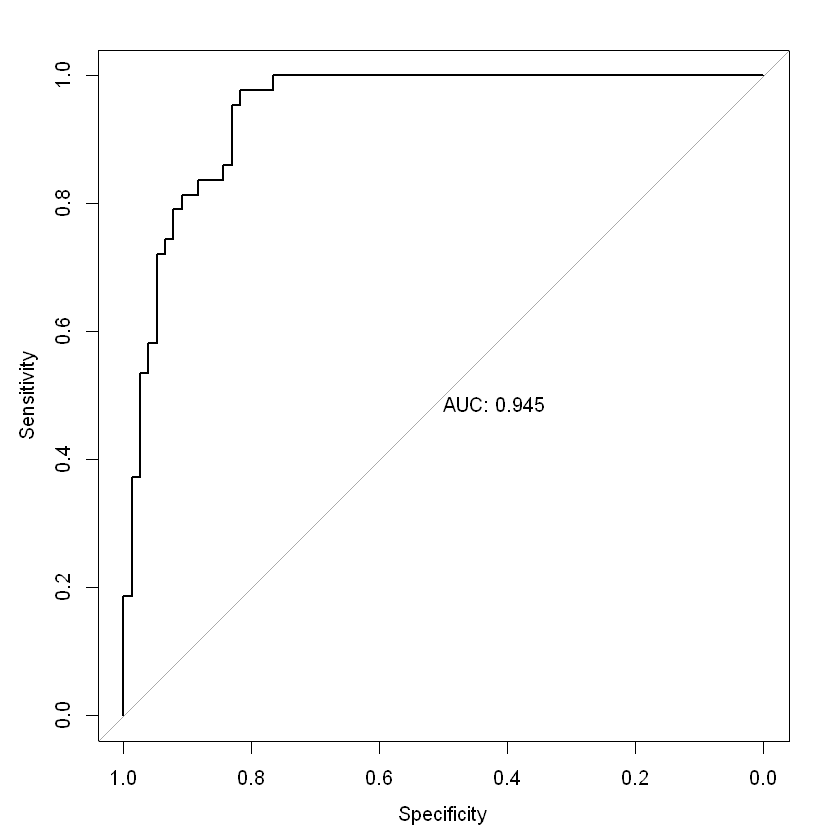

In [122]:
test_roc=roc(final.test$Purchased~fitted.probabilities,plot=TRUE,print.auc=TRUE)

<h1> ROC is plotted between True Positive Rate (Sensitivity)(Y axis) and False Positive Rate(Specificity)(x axis)

<h3> True Positive Rate indicates how many positive values, out of all positive values, have been correctly predicted. The formula to calculate the true positive rate is (TP/(TP + FN))

<H3> True negative rate inicates how many negative values, out of all negative values have been correctly predicted. The formula to calculate negative rate is (TN/(TN+FP))

<H1> Since the are under the curve is 0.945. It means that 94.5% the model is able to distinguish between positive an negative class. i.e the model is able to explain the variations of purchase that can be defined by age and salary